In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("Country-datas.csv")

In [3]:
df

,country,exports,imports
0,Afghanistan,10.0,44.9
1,Albania,28.0,48.6
2,Algeria,38.4,31.4
3,Angola,62.3,42.9
4,Antigua and Barbuda,45.5,58.9
...,...,...,...
162,Vanuatu,46.6,52.7
163,Venezuela,28.5,17.6
164,Vietnam,72.0,80.2
165,Yemen,30.0,34.4


In [4]:
df1=df.drop(["country"],axis=1)

In [5]:
df1

,exports,imports
0,10.0,44.9
1,28.0,48.6
2,38.4,31.4
3,62.3,42.9
4,45.5,58.9
...,...,...
162,46.6,52.7
163,28.5,17.6
164,72.0,80.2
165,30.0,34.4


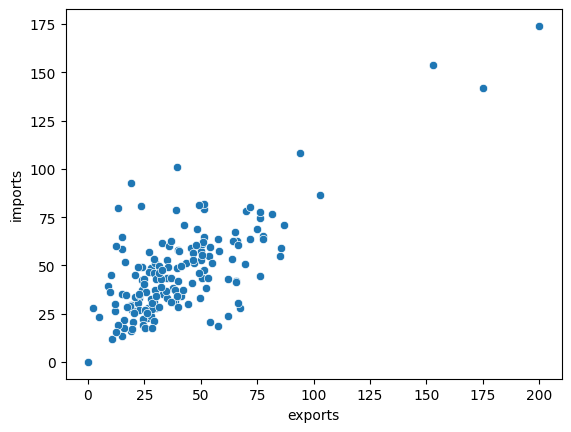

In [6]:
sns.scatterplot(data=df1,x=df["exports"],y=df["imports"])
plt.show()

In [7]:
km=KMeans(n_clusters=3)
km.fit(df1)

KMeans(n_clusters=3)

In [8]:
km.inertia_

62639.92879978858

In [9]:
centroids=km.cluster_centers_

In [10]:
centroids

array([[ 26.45099   ,  34.260659  ],
       [176.        , 156.66666667],
       [ 57.6890625 ,  61.478125  ]])

In [11]:
centroidsdf=pd.DataFrame(centroids,columns=["x","y"])

In [12]:
centroidsdf

,x,y
0,26.450990,34.260659
1,176.000000,156.666667
2,57.689062,61.478125


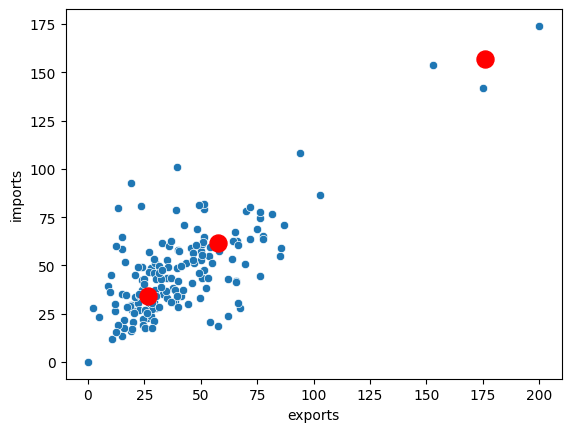

In [13]:
sns.scatterplot(data=df1,x=df["exports"],y=df["imports"])
plt.scatter(centroidsdf["x"],centroidsdf["y"],c="red",s=150)
plt.show()

In [14]:
wcss=[]
clusters=list(range(1,21))
for i in clusters:
     model=KMeans(n_clusters=i)
     model.fit(df1)
     wcss.append(model.inertia_)

In [15]:
wcss

[222028.73445899674,
 125508.92854577638,
 62635.4636324273,
 49240.706944064914,
 36708.07713696301,
 29453.713489921705,
 24659.993708923124,
 23342.900316429037,
 19542.26970874166,
 18572.14465197819,
 16748.38470311732,
 14863.807327641243,
 13409.48117122154,
 11461.057886055947,
 10723.890124318665,
 9509.036794416814,
 10086.124693853248,
 8141.558376588118,
 7575.145984556821,
 7300.250545541889]

In [16]:
clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

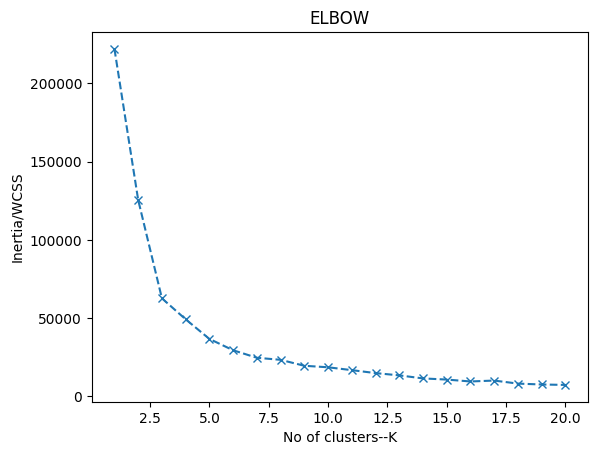

In [17]:
plt.plot(clusters,wcss,"x--")
plt.xlabel("No of clusters--K")
plt.ylabel("Inertia/WCSS")
plt.title("ELBOW")
plt.show() 

In [18]:
km2=KMeans(n_clusters=6)
km2.fit(df1)

KMeans(n_clusters=6)

In [20]:
km2.cluster_centers_

array([[ 20.57882692,  26.35319038],
       [ 53.68      ,  62.83333333],
       [176.        , 156.66666667],
       [ 48.16      ,  35.46333333],
       [ 28.37894737,  52.98947368],
       [ 80.96428571,  73.41428571]])

In [22]:
cen2=km2.cluster_centers_

In [23]:
cen2

array([[ 20.57882692,  26.35319038],
       [ 53.68      ,  62.83333333],
       [176.        , 156.66666667],
       [ 48.16      ,  35.46333333],
       [ 28.37894737,  52.98947368],
       [ 80.96428571,  73.41428571]])

In [24]:
cen2df=pd.DataFrame(cen2,columns=["x","y"])

In [25]:
cen2df

,x,y
0,20.578827,26.353190
1,53.680000,62.833333
2,176.000000,156.666667
3,48.160000,35.463333
4,28.378947,52.989474
5,80.964286,73.414286


In [26]:
km2.labels_

array([4, 4, 3, 3, 1, 0, 4, 0, 3, 3, 4, 1, 0, 4, 1, 5, 1, 0, 1, 3, 4, 4,
       0, 3, 1, 0, 0, 1, 0, 0, 4, 0, 4, 3, 0, 0, 4, 4, 5, 3, 3, 3, 1, 1,
       3, 0, 0, 0, 4, 5, 0, 5, 1, 3, 0, 3, 4, 4, 3, 4, 0, 4, 0, 4, 0, 1,
       4, 5, 3, 0, 0, 0, 3, 5, 3, 0, 4, 0, 1, 3, 0, 4, 3, 1, 4, 1, 4, 1,
       4, 3, 1, 2, 4, 4, 0, 5, 5, 0, 2, 1, 1, 4, 1, 1, 4, 4, 4, 0, 1, 0,
       5, 0, 4, 0, 3, 3, 0, 5, 1, 0, 3, 3, 0, 3, 4, 0, 0, 4, 3, 4, 4, 5,
       0, 2, 5, 1, 1, 0, 3, 0, 0, 4, 0, 3, 3, 1, 4, 0, 1, 0, 4, 4, 1, 0,
       1, 0, 1, 5, 0, 0, 0, 0, 1, 0, 5, 0, 3])

In [28]:
df["labels"]=km2.labels_

In [29]:
df

,country,exports,imports,labels
0,Afghanistan,10.0,44.9,4
1,Albania,28.0,48.6,4
2,Algeria,38.4,31.4,3
3,Angola,62.3,42.9,3
4,Antigua and Barbuda,45.5,58.9,1
...,...,...,...,...
162,Vanuatu,46.6,52.7,1
163,Venezuela,28.5,17.6,0
164,Vietnam,72.0,80.2,5
165,Yemen,30.0,34.4,0


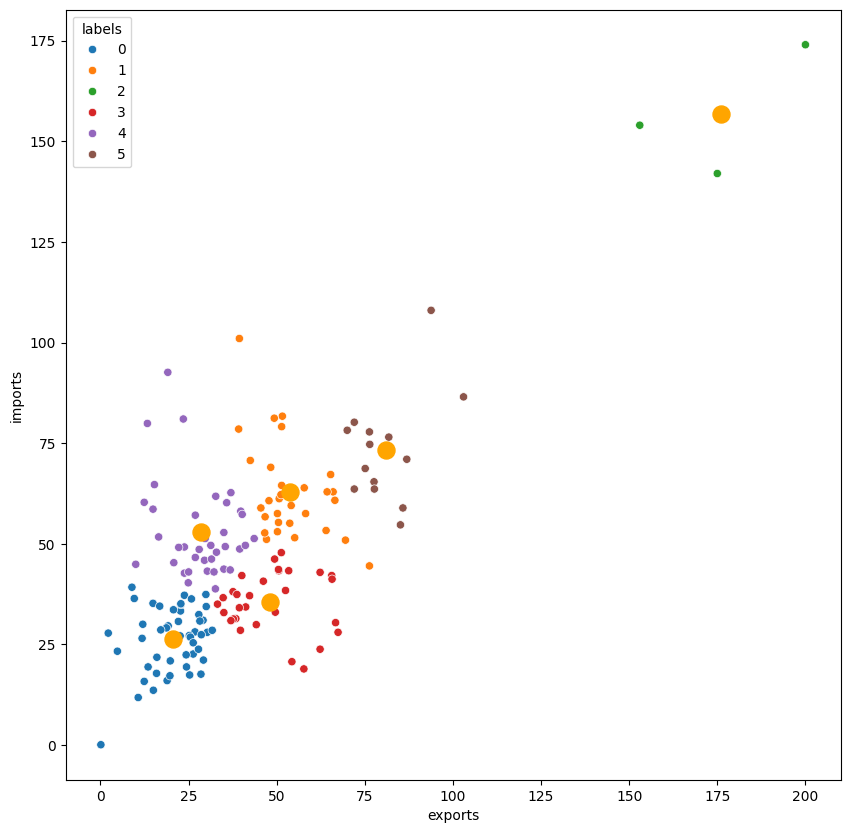

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x=df1["exports"],y=df["imports"],hue="labels",palette="tab10")
plt.scatter(cen2df["x"],cen2df["y"],c="orange",s=150)
plt.show()